# 그래디언트 부스팅_예측 11/16(수)

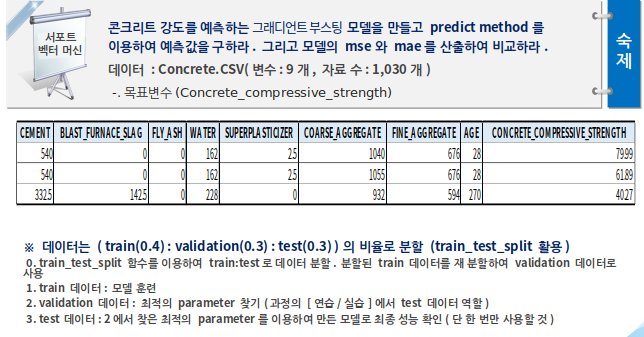

## 모듈 import

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split, RandomizedSearchCV
display(HTML("<style>.container { width:100% !important; }</style>"))


In [89]:
plt.rcParams['font.family']='NanumGothic'

### STEP1 데이터 구성하기

In [120]:
df_raw =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/Concrete.csv",engine='python',encoding='cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [121]:
# 결측값 확인
df_raw.isnull().sum()

CEMENT                           0
BLAST_FURNACE_SLAG               0
FLY_ASH                          0
WATER                            0
SUPERPLASTICIZER                 0
COARSE_AGGREGATE                 0
FINE_AGGREGATE                   0
AGE                              0
CONCRETE_COMPRESSIVE_STRENGTH    0
dtype: int64

In [122]:
# 요약 통계량 확인
df_raw.describe()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# 변수 간의 경향성 파악 : 그래프 분석

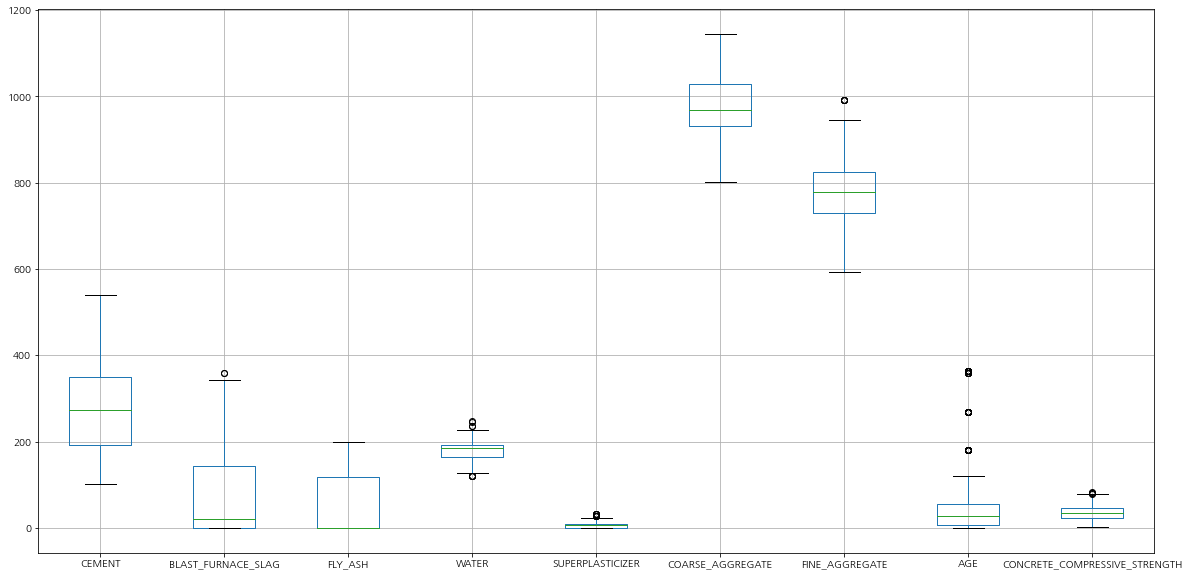

In [123]:
# boxplot으로 이상치 확인
pd.plotting.boxplot(df_raw, figsize=(20,10))
# boxplot 상 AGE에 이상치가 있어보이지만 최대값이 365로 통일된 것으로 보아 분산이 큰 데이터로 판단했음

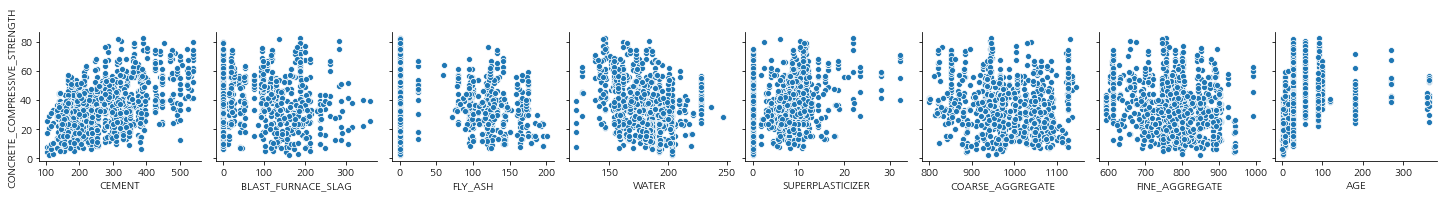

In [124]:
# y변수와 x변수들 간의 산점도 확인
sns.pairplot(df_raw, y_vars = "CONCRETE_COMPRESSIVE_STRENGTH", x_vars = df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1).columns)

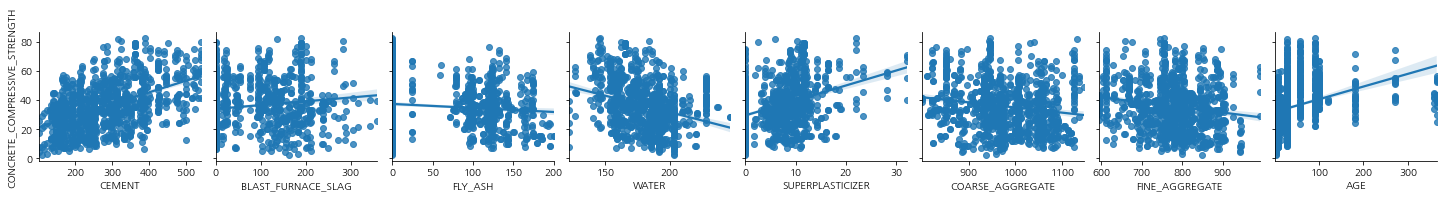

In [125]:

# y변수와 x변수들 간의 산점도 확인2
sns.pairplot(df_raw, y_vars = "CONCRETE_COMPRESSIVE_STRENGTH", x_vars = df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1).columns, kind='reg')

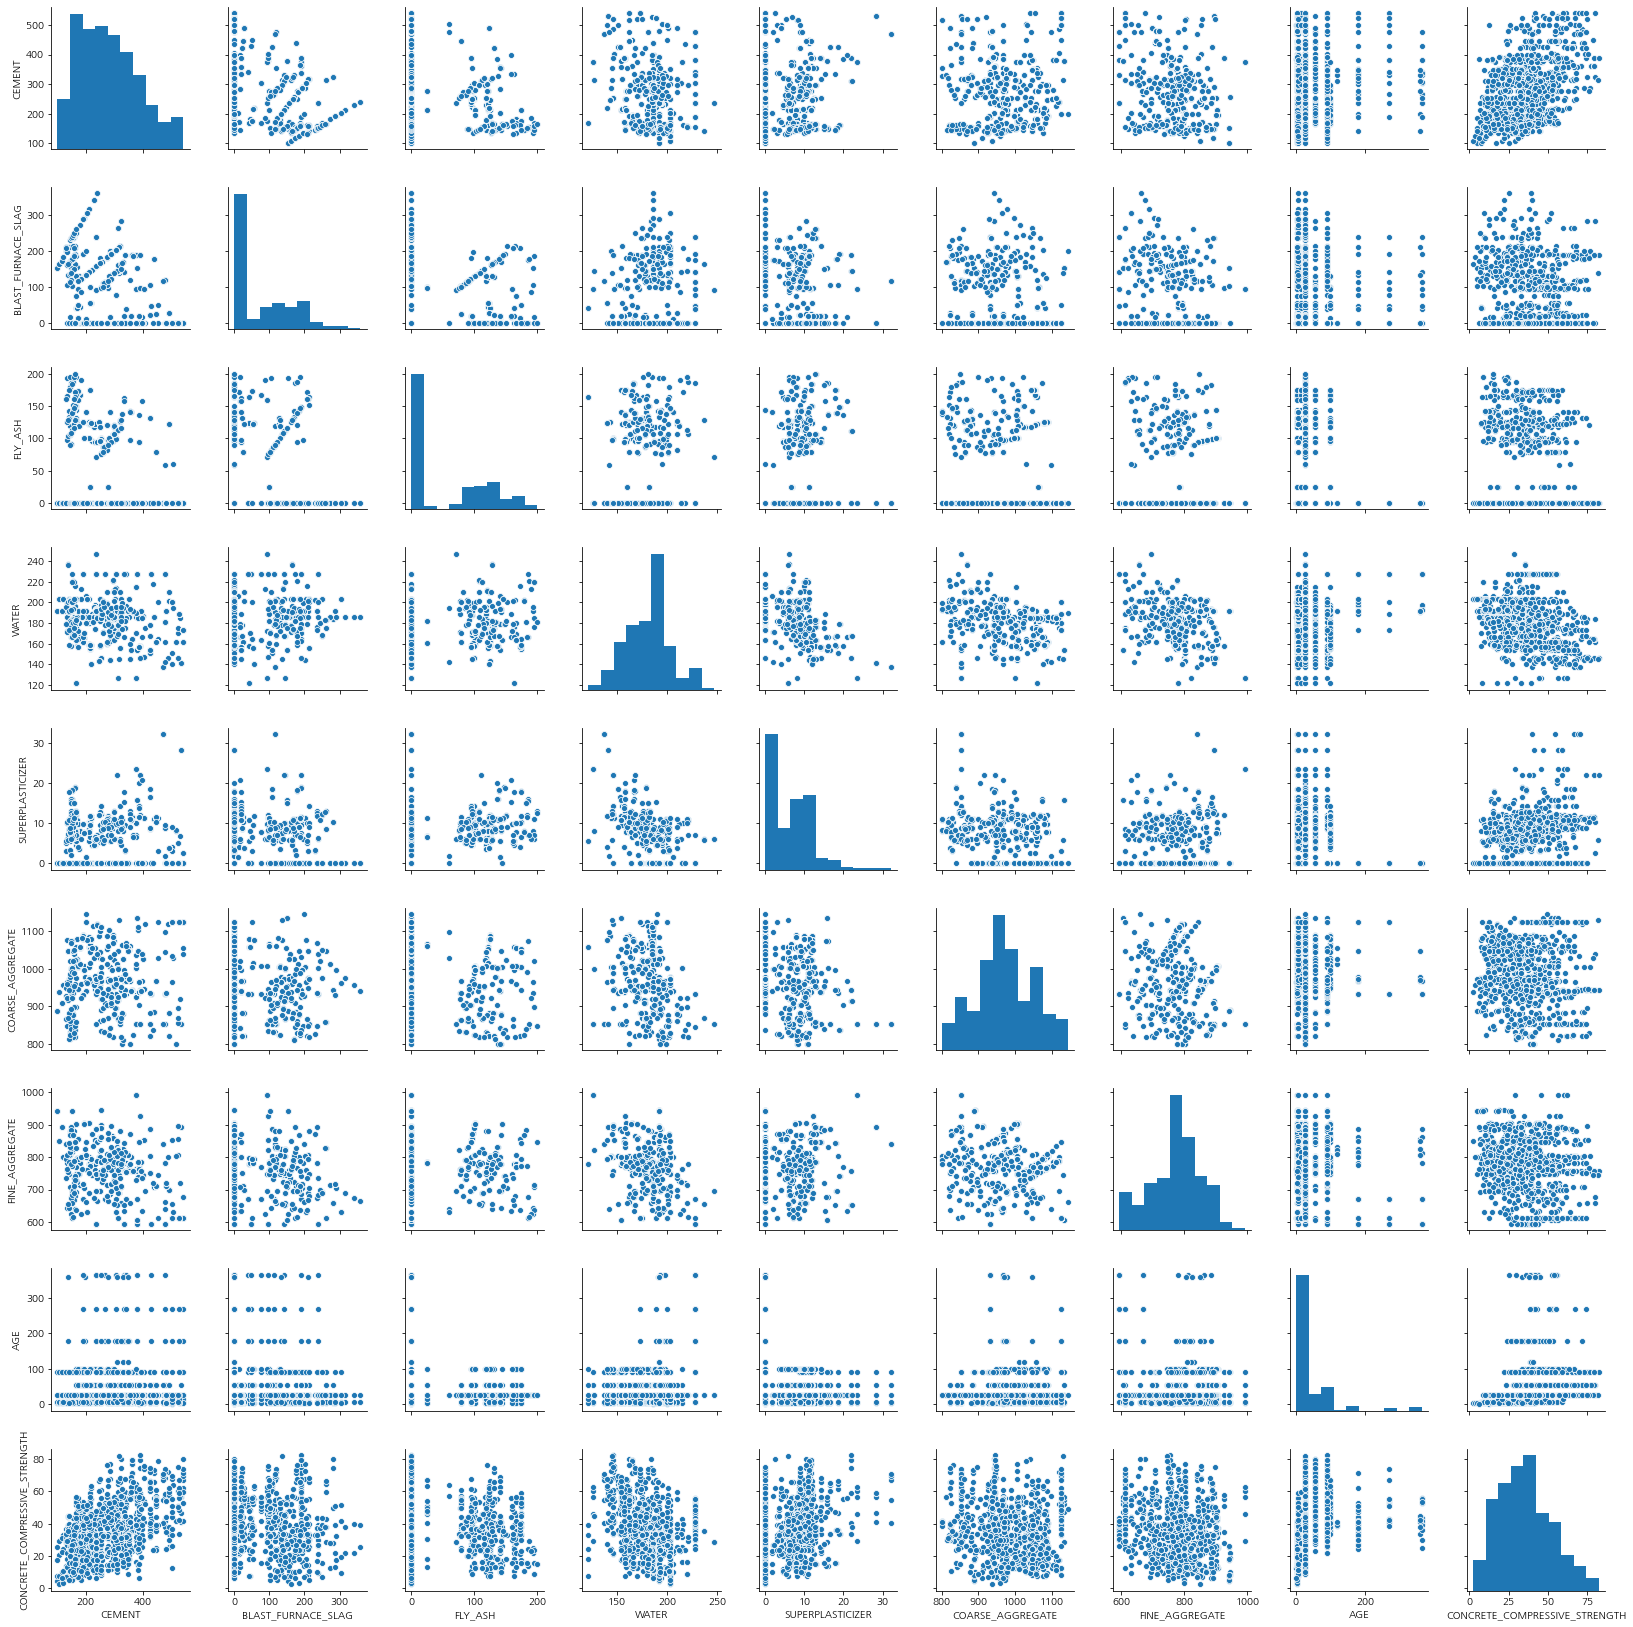

In [126]:
# 각 변수들 간의 산점도 확인
sns.pairplot(df_raw)

In [127]:
# 변수들 간 상관 분석
df_raw.corr().round(3)

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
CEMENT,1.000,-0.275,-0.397,-0.082,0.092,-0.109,-0.223,0.082,0.498
BLAST_FURNACE_SLAG,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
FLY_ASH,-0.397,-0.324,1.000,-0.257,0.378,-0.010,0.079,-0.154,-0.106
WATER,-0.082,0.107,-0.257,1.000,-0.658,-0.182,-0.451,0.278,-0.290
SUPERPLASTICIZER,0.092,0.043,0.378,-0.658,1.000,-0.266,0.223,-0.193,0.366
COARSE_AGGREGATE,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.178,-0.003,-0.165
FINE_AGGREGATE,-0.223,-0.282,0.079,-0.451,0.223,-0.178,1.000,-0.156,-0.167
AGE,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
CONCRETE_COMPRESSIVE_STRENGTH,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


### CONCRETE_COMPRESSIVE_STRENGTH와 가장 상관관계가 높은 변수 는 CEMENT, SUPERPLASTICIZER, AGE 3가지 이다.

### 데이터 구성하기

In [171]:
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1, inplace=False)

In [172]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x, df_validation_x, df_train_y,df_validation_y = train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
# 데이터 셋을 7:3으로 train 과 test로 나눴다.
# train 을 0.5714 : 0.429 로 나눴다.
# 따라서 train : validation : test = 4 : 3: 3 이 되었다.

In [173]:
print(" train data X size:{}".format(df_train_x.shape))
print(" train data Y size:{}".format(df_train_y.shape))
print(" validation data X size:{}".format(df_validation_x.shape))
print(" validation data Y size:{}".format(df_validation_y.shape))
print(" test data X size:{}".format(df_test_x.shape))
print(" test data Y size:{}".format(df_test_y.shape))
# train : validation : test = 4 : 3: 3 이 되었는지 확인해보았다. 그결과 split이 잘 되었다. 

 train data X size:(412, 8)
 train data Y size:(412,)
 validation data X size:(309, 8)
 validation data Y size:(309,)
 test data X size:(309, 8)
 test data Y size:(309,)


## 기본 모델 학습

In [174]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print('Score on training set{:.3f}.'.format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set{:.3f}".format(gb_uncustomized.score(df_validation_x,df_validation_y)))
# 기본 옵션으로 모델 생성후 
# 모델설명력은 Train 95.7% , test = 83.8 % 의 설명력을 갖는다. 따라서 train 데이터에 과대적합이다.

Score on training set0.957.
Score on test set0.838


## 모델 생성 

In [175]:
# train 및 validation 의 설명력 결과 저장
train_score ,validation_score = [],[]
# para_n_tree 트리 수 변경(10~ 100)
para_n_tree= [depth * 10 for depth in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
# 결과 저장

df_score_n = pd.DataFrame()    
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['ValidationScore']=validation_score

In [176]:
df_score_n.round(3)
# 모델의 설명력 확인

,MinSamplesLeaf,TrainScore,ValidationScore
0,10,0.666,0.565
1,20,0.827,0.718
2,30,0.885,0.781
3,40,0.911,0.804
4,50,0.926,0.815
5,60,0.936,0.823
6,70,0.943,0.831
7,80,0.948,0.833
8,90,0.953,0.837
9,100,0.957,0.838


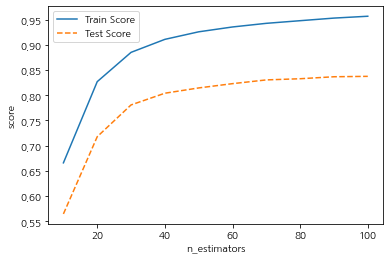

In [177]:
plt.plot(para_n_tree,train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, validation_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('n_estimators')
plt.legend()
# Train 과 test가 계속적으로 향상되고 있어서 100으로 선택


In [178]:
# train 및 test 설명력 결과 저장
train_score ,validation_score = [],[]
# min_samples_leaf: 입사귀 최소 자료수
para_leaf= [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_estimators in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=100, min_samples_leaf=v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
# 결과 저장
df_score_leaf = pd.DataFrame()    
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=validation_score

In [179]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.957,0.838
1,2,0.956,0.843
2,3,0.956,0.849
3,4,0.957,0.847
4,5,0.957,0.850
5,6,0.953,0.849
6,7,0.952,0.852
7,8,0.952,0.844
8,9,0.950,0.854
9,10,0.950,0.846


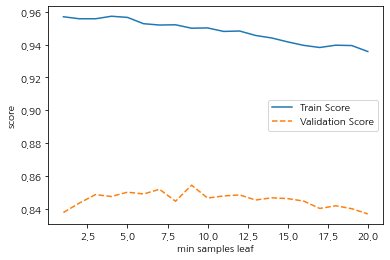

In [180]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf,validation_score, linestyle='--', label = 'Validation Score')
plt.ylabel("score")
plt.xlabel('min samples leaf')
plt.legend()

In [181]:
# train 및 validation 설명력 결과를 저장
train_score ,validation_score = [],[]
#para_split 분할 하기위한 노드의 최소 자료 수 
para_split= [n_leaf * 2 for n_leaf in range(1,21)]

for v_min_estimators in para_split:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=100,min_samples_leaf=9,min_samples_split=v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))

df_score_split = pd.DataFrame()    
df_score_split['MinSamplesLeaf']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=validation_score

In [182]:
df_score_split.round(3)
# 설명력 확인

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.950,0.854
1,4,0.950,0.854
2,6,0.950,0.854
3,8,0.950,0.854
4,10,0.950,0.854
5,12,0.950,0.854
6,14,0.950,0.854
7,16,0.950,0.854
8,18,0.950,0.854
9,20,0.947,0.854


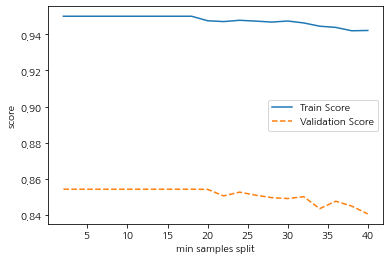

In [183]:
# 모델 설명력 그래프확인
plt.plot(para_split,train_score, linestyle='-', label='Train Score')
plt.plot(para_split, validation_score, linestyle='--', label = 'Validation Score')
plt.ylabel("score")
plt.xlabel('min samples split')
plt.legend()

In [197]:
# train 및 test 설명력 결과 저장
train_score ,validation_score = [],[]
#para_depth= 최대 깊이 파라미터
para_depth= [depth for depth in range(1,11)]

for v_min_estimators in para_depth:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=100,min_samples_leaf=9,min_samples_split=20,max_depth = v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))

    # 결과 저장
df_score_depth = pd.DataFrame()    
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=validation_score

In [198]:
df_score_depth.round(3)
# 모델 설명력 확인

,Depth,TrainScore,TestScore
0,1,0.839,0.755
1,2,0.906,0.828
2,3,0.947,0.854
3,4,0.972,0.856
4,5,0.984,0.849
5,6,0.988,0.855
6,7,0.990,0.850
7,8,0.992,0.861
8,9,0.992,0.844
9,10,0.993,0.849


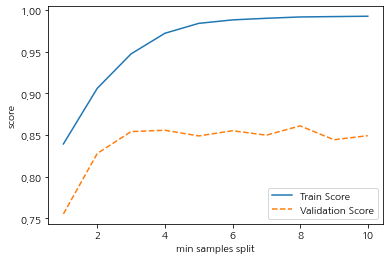

In [199]:
plt.plot(para_depth,train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, validation_score, linestyle='--', label = 'Validation Score')
plt.ylabel("score")
plt.xlabel('min samples split')
plt.legend()

# 모델 설명력 그래프 확인: 22개

In [188]:
#train 및 validation 설명력 결과 저장
train_score ,validation_score = [],[]
#para_depth 최대 깊이 파라미터 저장 
para_lr= [depth *0.1 for depth in range(1,10)]

for v_min_estimators in para_lr:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=100,min_samples_leaf=9,min_samples_split=20,max_depth = 4,learning_rate=v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
# 결과 저장
df_score_lr = pd.DataFrame()    
df_score_lr['Depth']=para_lr
df_score_lr['TrainScore']=train_score
df_score_lr['ValidationScore']=validation_score

In [200]:
# 모델 설명력 확인
df_score_lr.round(3)

,Depth,TrainScore,ValidationScore
0,0.1,0.972,0.856
1,0.2,0.985,0.857
2,0.3,0.989,0.850
3,0.4,0.992,0.866
4,0.5,0.995,0.861
5,0.6,0.996,0.863
6,0.7,0.997,0.858
7,0.8,0.997,0.832
8,0.9,0.997,0.804


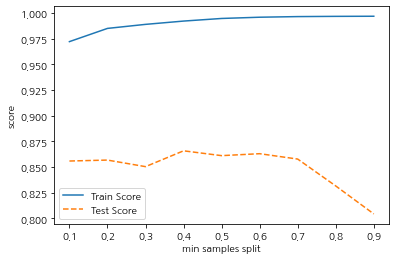

In [190]:
# 모델 설명력 확인
plt.plot(para_lr,train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, validation_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('min samples split')
plt.legend()

# 최종 모델 생성

In [201]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234, n_estimators=100,min_samples_leaf=9,min_samples_split=20,max_depth = 4,learning_rate=0.4)
gb_uncustomized.fit(df_train_x,df_train_y)
print('Score on training set{:.3f}.'.format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

# test셋의 Score가 0.838 에서 0.873으로 증가하여 좋은 모델을 만들었다고 할 수 있다.

Score on training set0.992.
Score on test set0.873


In [192]:

# feature_importance로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance['Importance']= gb_uncustomized.feature_importances_

# df_feature_importance 의 테이블 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


,Feature,Importance
7,AGE,0.326
0,CEMENT,0.313
3,WATER,0.190
1,BLAST_FURNACE_SLAG,0.074
4,SUPERPLASTICIZER,0.034
6,FINE_AGGREGATE,0.031
5,COARSE_AGGREGATE,0.019
2,FLY_ASH,0.012


Text(0, 0.5, '변수')

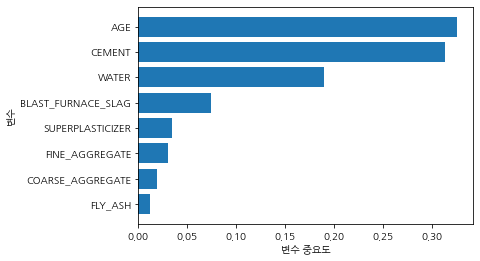

In [193]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 중요 설명 변수: AGE, CEMENT, WATER 순으로 영향이 크다고 해석 할 수 있음.
### 하지만 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

# 주성분 분석

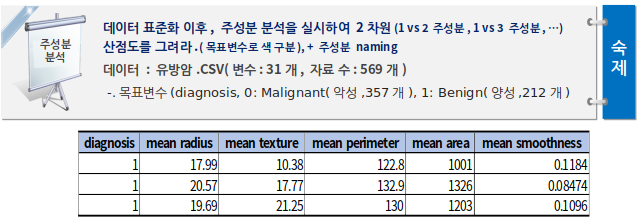

In [3]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['sans-serif']


In [4]:
df_breast =pd.read_csv("C:/Users/nsh65/Documents/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv",engine='python',encoding='cp949')
df_breast.head()
# df_raw =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv",engine='python',encoding='cp949')




,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_breast_x = df_breast.drop("diagnosis",axis = 1)
df_breast_y = df_breast["diagnosis"]
df_breast_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 ### 상관계수로 상관관계 확인해보기 

In [6]:
df_breast_x.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


#### 산점도 행렬로 관계확인해보기

In [7]:
sns.pairplot(df_breast_x)

Error in callback <function flush_figures at 0x000001E2B7FE89D0> (for post_execute):


KeyboardInterrupt: 

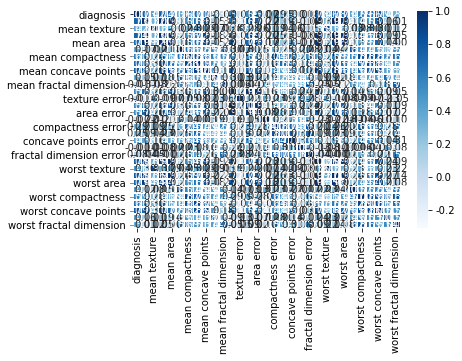

In [8]:
sns.heatmap(df_breast.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Blues' )

In [9]:
df_breast_x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

####  데이터 표준화

In [10]:
#데이터 표준화
scaler = StandardScaler()
#데이터표준화변환
df_breast_x_scaled = scaler.fit_transform(df_breast_x)
#표준화된 데이터 확인
print("Scaled Data :\n{}".format(df_breast_x_scaled[:4].round(3)))
print("Shape :\n{}".format(df_breast_x_scaled.shape))


Scaled Data :
[[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550e-

In [11]:
type(df_breast_x_scaled)

numpy.ndarray

####  주성분 값 및 주성분데이터의 모양 shape() 로 확인

In [12]:
# 주성분 분석모델 생성 Prin1 ~ 30 까지
pca = PCA(n_components=30)
x_pca = pca.fit_transform(df_breast_x_scaled)
#계산된 Prin1~6까지의 Row개수, column개수 화인
print("PCA DATA : \n{}".format(x_pca[:29]))
#shape : Prin 1~6까지 Row개수, column개수 확인
print("Shape: \n{}".format(x_pca.shape))
print("Shape: \n{}".format(df_breast_x_scaled.shape))
#주성분 점수 저장
df_x_pca = pd.DataFrame(x_pca,columns = ["Prin"+ str(i) for i in range(1,31)])
#주성분 점수 저장
df_x_pca.head()

PCA DATA : 
[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.86787626

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


####  주성분 간의 목표변수에 대한 산점도

In [13]:
print(x_pca.shape) # 30개 주성분들이 569개의 새로운점을 가짐
print(x_pca[:,1].shape)# 확인

(569, 30)
(569,)


Text(0, 0.5, 'Second Principal Component')

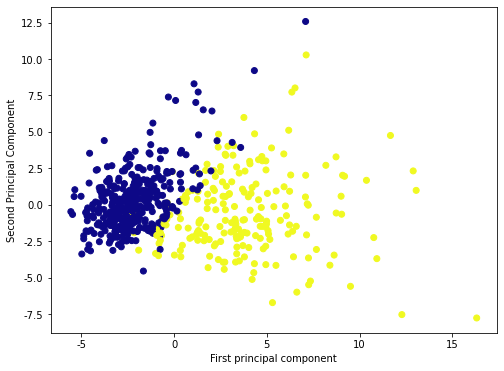

In [14]:
# 주성분 1과 2의 산점도. 색구분 = 'diagnosis'(목표변수)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_breast['diagnosis'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [15]:
x_pca[:,1]# 데이터 확인

array([ 1.94858307e+00, -3.76817174e+00, -1.07517380e+00,  1.02755891e+01,
       -1.94807157e+00,  3.94992890e+00, -2.69003128e+00,  2.34024401e+00,
        3.39181295e+00,  7.72717407e+00, -2.65927550e+00,  6.65679266e-02,
        2.70097649e+00, -9.68279261e-01,  4.86108331e+00,  2.97706118e+00,
       -1.56475773e+00,  1.41867033e+00, -4.11433352e+00, -1.88214954e-01,
        5.72808193e-01,  1.66294990e+00,  3.30496373e+00, -5.12836651e+00,
       -1.54375229e+00,  2.01861034e+00,  2.17162512e+00, -1.87655235e+00,
        5.37242161e-01, -1.52370502e+00, -7.57177451e-01,  4.00529551e+00,
        3.37536154e-01, -1.13258891e+00,  7.58423243e-01, -3.54355942e-01,
        9.13196276e-01, -1.41347312e+00, -3.35129292e+00,  8.86243953e-01,
       -1.92399162e+00,  2.26075201e+00,  2.01867310e+00,  9.84930020e-01,
       -1.37099091e-01, -1.34876978e-01,  1.48422032e+00,  2.35227179e+00,
        9.58296095e-02, -1.20843321e+00, -1.28249558e+00, -1.68895860e+00,
       -4.98218714e-01, -

Text(0, 0.5, 'third Principal Component')

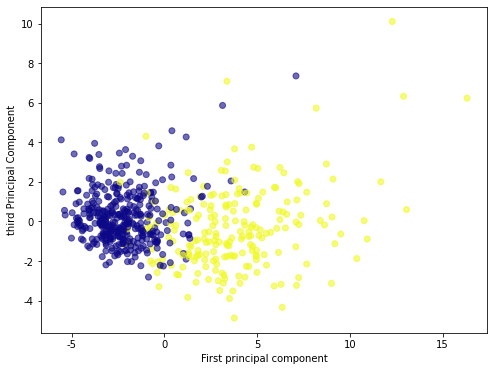

In [16]:
# 주성분 1과 3의 산점도. 색구분 = 'diagnosis'(목표변수)
# 주성분은 설명변수의 하나마다 새로운 점들이 생긴다.
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=df_breast['diagnosis'],cmap='plasma',alpha=0.6)
plt.xlabel('First principal component')
plt.ylabel('third Principal Component')

Text(0, 0.5, 'fourth Principal Component')

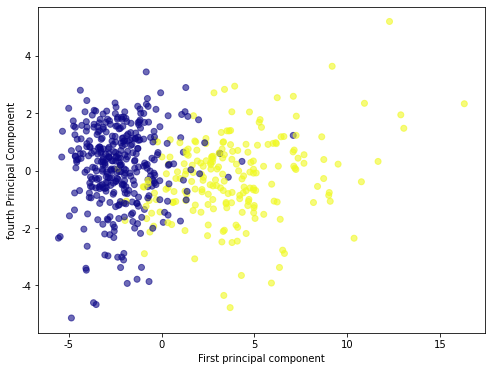

In [17]:
# 주성분 1과 4의 산점도. 색구분 = 'diagnosis'(목표변수)
# 주성분은 설명변수의 하나마다 새로운 점들이 생긴다.
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,3],c=df_breast['diagnosis'],cmap='plasma',alpha=0.6)
plt.xlabel('First principal component')
plt.ylabel('fourth Principal Component')

In [18]:
# diagnosis 데이터 프레임 df1 생성
df1 = pd.DataFrame(df_breast['diagnosis'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   diagnosis  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [19]:
# 주성분 데이터 프레임 reformed생성
reformed = pd.DataFrame(x_pca)
# 주성분 데이터 프레임 컬럼명 변경
reformed.columns = [str(i)+ "_"+ "principal_component" for i in range(1,31)]

reformed.head()

,1_principal_component,2_principal_component,3_principal_component,4_principal_component,5_principal_component,6_principal_component,7_principal_component,8_principal_component,9_principal_component,10_principal_component,...,21_principal_component,22_principal_component,23_principal_component,24_principal_component,25_principal_component,26_principal_component,27_principal_component,28_principal_component,29_principal_component,30_principal_component
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [20]:
# diagnosis(목표변수),주성분 데이터 프레임 조인
final_df = reformed.join(df1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   1_principal_component   569 non-null    float64
 1   2_principal_component   569 non-null    float64
 2   3_principal_component   569 non-null    float64
 3   4_principal_component   569 non-null    float64
 4   5_principal_component   569 non-null    float64
 5   6_principal_component   569 non-null    float64
 6   7_principal_component   569 non-null    float64
 7   8_principal_component   569 non-null    float64
 8   9_principal_component   569 non-null    float64
 9   10_principal_component  569 non-null    float64
 10  11_principal_component  569 non-null    float64
 11  12_principal_component  569 non-null    float64
 12  13_principal_component  569 non-null    float64
 13  14_principal_component  569 non-null    float64
 14  15_principal_component  569 non-null    fl

In [21]:
final_df.columns

Index(['1_principal_component', '2_principal_component',
       '3_principal_component', '4_principal_component',
       '5_principal_component', '6_principal_component',
       '7_principal_component', '8_principal_component',
       '9_principal_component', '10_principal_component',
       '11_principal_component', '12_principal_component',
       '13_principal_component', '14_principal_component',
       '15_principal_component', '16_principal_component',
       '17_principal_component', '18_principal_component',
       '19_principal_component', '20_principal_component',
       '21_principal_component', '22_principal_component',
       '23_principal_component', '24_principal_component',
       '25_principal_component', '26_principal_component',
       '27_principal_component', '28_principal_component',
       '29_principal_component', '30_principal_component', 'diagnosis'],
      dtype='object')

#### 주성분 전체와, 목표변수인 dianosis 간의 산점도 그래프 

In [22]:
sns.set(style = "ticks")
sns.pairplot(final_df,hue="diagnosis")


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E2B7FE89D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
### 주성분 각각의 고유값 결과 확인해보기

In [ ]:
# 고유값 확인
#주성분 통계량 입력용 새로운 데이터 프레임 생성
df_pca = pd.DataFrame()
#주성분 분석 모델의 주성분 번호, Elgenvalue, Eigenvalue Ratio 등을 데이터 프레임의 형태로 저장
df_pca["Prin"] = [i for i in range(1,31)]
df_pca["EigenValues"] = pca.explained_variance_##Eigen values
df_pca["EigenValueRatio"] = pca.explained_variance_ratio_## Eigenvalue Ratio
df_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca.round(3)
# 아이젠벡터의 값이 큰 주성분이 설명력이 높다

In [ ]:
df_pca['Prin']

#### 각 주성분의 고유벡터 확인하기.

In [ ]:
# 주성분 통계량 입력용 새로운 데이터 프레임 생성
df_feature = pd.DataFrame({"Feature":df_breast_x.columns[:5]})
df_feature

In [ ]:
df_breast_x.columns# 주성분 통계량 입력용 새로운 데이터 프레임 생성
df_feature = pd.DataFrame({"Feature":["Prin"+str(i) for i in range(1,6)]})

# 주성분 prin1~30까지의 고유벡터 저장
df_eigenvectors = pd.concat([df_feature,pd.DataFrame(pca.components_,columns = df_breast_x.columns)],axis =1)
df_eigenvectors.round(3)
# 

In [ ]:
df_feature

#### Scree Plot확인

In [ ]:
# 고유값 비율 그래프 생성
plt.plot(df_pca["Prin"],df_pca["EigenValueRatio"],label ="Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca["Prin"],df_pca["CumsumEigenValueRatio"],label = "Cumsum Ratio")
# 그래프 label, lengend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc = "best")


####  주성분 데이터 상관관계

In [ ]:
#산점도 행렬df_x_pca_const
sns.pairplot(df_x_pca)
df_x_pca.corr().round(3)

#### 주성분 회귀분석 실행 

In [ ]:
# 회귀분석 패키지 불러오기
import statsmodels.api as sm
# Scree plot을 이용하여 선택한 주성분
x_var = ["Prin"+str(i) for i in range(1,6)]
# 기존 주성분 데이터에 절편컬럼 추가
df_x_pca_const = sm.add_constant(df_x_pca[x_var])
# train, test데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(df_x_pca_const,df_breast_y,test_size= 0.3, random_state= 2222)
#train data로 회귀분석 모델 생성
reg_model = sm.OLS(y_train,x_train)
#fit :회귀모형의 fit line 생성# 주성분 통계량 입력용 새로운 데이터 프레임 생성
reg_model = reg_model.fit()
# Summary():회귀분석 통계량 결과 확인
print(reg_model.summary())

### 회귀분석 결과) 
    
###    - 분석 자료수 : 398
    
 ###   - 잔차 자유도 :392
    
  ###  - 모델 자유도 :5
    
 ###   - 아노바 분석 결과 : p값이 유의수준 0.05보다 작다 -> 회귀모델로서 유의
    
  ###  - 설명력(R _square): 71% - >  회귀모델로 Eval 변동을 72% 설명
    
 ###   - 회귀계수 검정: prin1 ~ prin5까지 pvalue가 유의수준 0.05보다 작으므로 계수로서 유의함